In [1]:
import os
from glob import glob
from tqdm import tqdm

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch

import sys
sys.path.append('/root/dacon-epitope/dacon-sem')
# sys.path.append('/home/youngkim21/dacon/dacon-sem')
from src.datasets.sem_dataset import SEMDataset
from src.datasets.sem_datamodule import SEMDataModule

ModuleNotFoundError: No module named 'src'

In [2]:
# data_path = os.path.abspath('/shared/Samsung/')
data_path = os.path.abspath('/home/youngkim21/dacon/sem-data')
simulation_sem_paths = os.path.join(data_path, 'simulation_data', 'SEM', '*', '*', '*.png')
simulation_sem_paths = np.array(sorted(glob(simulation_sem_paths)))
simulation_depth_paths = os.path.join(data_path, 'simulation_data', 'Depth', '*', '*', '*.png')
simulation_depth_paths = np.array(sorted(glob(simulation_depth_paths) + glob(simulation_depth_paths)))
simulation_data_len = len(simulation_sem_paths)

train_sem_paths = os.path.join(data_path, 'train', 'SEM', '*', '*', '*.png')
train_sem_paths = np.array(sorted(glob(train_sem_paths)))
train_data_len = len(train_sem_paths)

test_sem_paths = os.path.join(data_path, 'test', 'SEM', '*.png')
test_sem_paths = np.array(sorted(glob(test_sem_paths)))
test_data_len = len(test_sem_paths)

case_list = ['Case_1', 'Case_2', 'Case_3', 'Case_4']

simulation_sem_by_case = []
for case in case_list:
    t_path = os.path.join(data_path, 'simulation_data', 'SEM', case, '*', '*.png')
    t_path = np.array(sorted(glob(t_path)))
    simulation_sem_by_case.append(t_path)

simulation_depth_by_case = []
for case in case_list:
    t_path = os.path.join(data_path, 'simulation_data', 'Depth', case, '*', '*.png')
    t_path = np.array(sorted(glob(t_path)))
    simulation_depth_by_case.append(t_path)

depth_list = ['Depth_110', 'Depth_120', 'Depth_130', 'Depth_140']

train_sem_by_depth = []
for depth in depth_list:
    t_path = os.path.join(data_path, 'train', 'SEM', depth, '*', '*.png')
    t_path = np.array(sorted(glob(t_path)))
    train_sem_by_depth.append(t_path)

# train_average_depth = pd.read_csv('/shared/Samsung/train/average_depth.csv')
train_average_depth = pd.read_csv('/home/youngkim21/dacon/sem-data/train/average_depth.csv')

print([len(t_path) for t_path in simulation_sem_by_case])
print([len(t_path) for t_path in simulation_depth_by_case])
print([len(t_path) for t_path in train_sem_by_depth])

[43326, 43326, 43326, 43326]
[21663, 21663, 21663, 21663]
[15166, 15166, 15166, 15166]


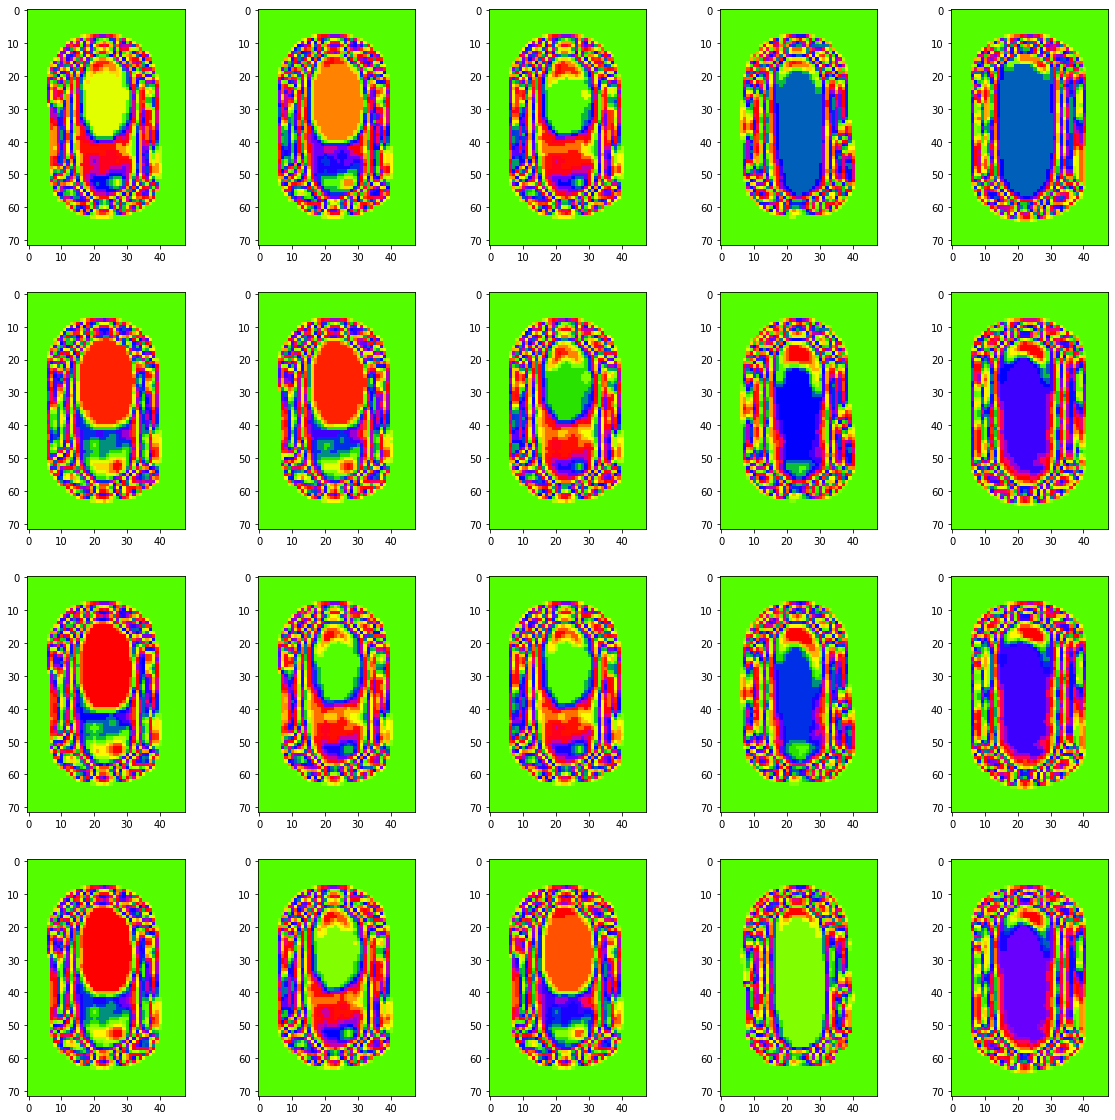

In [11]:
plt.figure(figsize=(20, 20))
for row, (case, paths) in enumerate(zip(case_list, simulation_depth_by_case)):
    for col, depth_path in enumerate(paths):
        img = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(4, 5, 5*row+col+1)
        plt.imshow(img, cmap='prism')
        if col == 4:
            break
            

In [3]:
for row, (case, paths) in enumerate(zip(case_list, simulation_depth_by_case)):
    print(case)
    for col, depth_path in enumerate(paths):
        img = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
        print(np.average(img[0]))
        print(np.average(img))
        break
            

Case_1
140.0
102.18315972222223
Case_2
150.0
107.96469907407408
Case_3
160.0
115.08275462962963
Case_4
170.0
121.63483796296296


In [4]:
sub_dir = '/home/youngkim21/dacon/dacon-sem/output/sub_pred'
pred_path = sorted(glob(os.path.join(sub_dir, '*.png')))
len(pred_path)

25988

In [5]:
for path in pred_path:
    name = os.path.basename(path)
    idx = int(name[:-4])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    print(np.average(img))
    print(np.average(img[0]))
    print(img[0])
    
    if idx == 5:
        break

103.58940972222223
140.16666666666666
[137 141 141 141 140 140 140 141 141 141 141 141 141 141 141 140 140 140
 140 140 140 140 139 140 140 140 140 140 140 139 139 140 140 140 140 140
 140 140 141 141 140 140 140 140 140 139 140 142]
103.37268518518519
140.14583333333334
[137 141 141 141 140 140 140 141 141 141 141 141 141 141 141 141 141 141
 140 140 140 140 140 140 140 140 140 140 139 139 139 139 139 139 140 140
 140 140 140 141 140 140 140 140 140 139 140 142]
100.03848379629629
140.10416666666666
[137 141 141 141 140 141 141 141 141 141 141 141 141 141 140 140 140 140
 139 139 139 138 138 138 139 139 139 139 140 140 140 140 140 140 140 141
 141 141 141 141 141 140 140 140 140 140 140 143]
99.80410879629629
140.54166666666666
[138 142 142 141 141 141 141 141 142 142 142 142 141 141 141 140 140 140
 140 140 140 140 140 140 140 140 140 140 140 141 140 140 140 140 140 140
 140 141 141 141 141 140 140 140 140 140 140 143]
102.53327546296296
140.27083333333334
[138 142 142 142 141 140 14

In [7]:
stat = {
    "Case_1" : (110, 101.7664403489864, 47.10571291605642),
    "Case_2" : (120, 108.28920790388032, 51.39030375234918),
    "Case_3" : (130, 114.81366495409051, 55.67178387136982),
    "Case_4" : (140, 121.34116433272469, 59.953447258273386),
    }

In [9]:
import zipfile


sub_imgs = []

os.chdir('/home/youngkim21/dacon/dacon-sem/output/submissions')
for path in pred_path:
    name = os.path.basename(path)
    idx = int(name[:-4])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    avg = int(np.average(img))

    if avg <= 105:
        img = img + 8
    elif avg <= 111:
        img = img + 11
    elif avg <= 118:
        img = img + 14
    elif avg > 118:
        img = img + 17
    img = img.astype(int)

    cv2.imwrite(name, img)
    sub_imgs.append(name)

with zipfile.ZipFile(f"../submission-calib.zip", 'w') as sub:
    for name in sub_imgs:
        sub.write(name)   

In [10]:
sub_dir = '/home/youngkim21/dacon/dacon-sem/output/submissions'
pred_path = sorted(glob(os.path.join(sub_dir, '*.png')))
len(pred_path)

for path in pred_path:
    name = os.path.basename(path)
    idx = int(name[:-4])
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    print(np.average(img))
    print(np.average(img[0]))
    print(img[0])
    
    if idx == 5:
        break

111.58940972222223
148.16666666666666
[145 149 149 149 148 148 148 149 149 149 149 149 149 149 149 148 148 148
 148 148 148 148 147 148 148 148 148 148 148 147 147 148 148 148 148 148
 148 148 149 149 148 148 148 148 148 147 148 150]
111.37268518518519
148.14583333333334
[145 149 149 149 148 148 148 149 149 149 149 149 149 149 149 149 149 149
 148 148 148 148 148 148 148 148 148 148 147 147 147 147 147 147 148 148
 148 148 148 149 148 148 148 148 148 147 148 150]
108.03848379629629
148.10416666666666
[145 149 149 149 148 149 149 149 149 149 149 149 149 149 148 148 148 148
 147 147 147 146 146 146 147 147 147 147 148 148 148 148 148 148 148 149
 149 149 149 149 149 148 148 148 148 148 148 151]
107.80410879629629
148.54166666666666
[146 150 150 149 149 149 149 149 150 150 150 150 149 149 149 148 148 148
 148 148 148 148 148 148 148 148 148 148 148 149 148 148 148 148 148 148
 148 149 149 149 149 148 148 148 148 148 148 151]
110.53327546296296
148.27083333333334
[146 150 150 150 149 148 1

In [43]:
# import zipfile


# sub_imgs = []

# os.chdir('/home/youngkim21/dacon/dacon-sem/output/submissions')
# for path in pred_path:
#     name = os.path.basename(path)
#     idx = int(name[:-4])
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     avg = int(np.average(img))

#     if avg <= 105:
#         img = img * stat["Case_1"][0]
#     elif avg <= 111:
#         img = img * stat["Case_2"][0]
#     elif avg <= 118:
#         img = img * stat["Case_2"][0]
#     elif avg > 118:
#         img = img * stat["Case_3"][0]
#     img = img.astype(int)

#     cv2.imwrite(name, img)
#     sub_imgs.append(name)

# with zipfile.ZipFile(f"../submission-calib.zip", 'w') as sub:
#     for name in sub_imgs:
#         sub.write(name)   